This analysis presents a detailed overview of a dataset extracted from the Bitcoin Alpha trading platform, focusing on the trust relationships among its users. Bitcoin Alpha operates in the cryptocurrency domain where anonymity is a standard feature, necessitating mechanisms to evaluate and record the reputation of its participants to mitigate risks associated with fraudulent activities.

**Network Composition:**
- **Nodes (Participants):** 3,783
- **Edges (Trust Relationships):** 24,186
- **Edge Weight Range:** -1 to +1, indicating levels of trust/distrust
- **Percentage of Positive Edges:** 93%

**Network Type:**
The dataset represents a Directed Weighted Signed Social Network. Each edge in this network is directed and assigned a weight that quantifies the intensity of trust or distrust (from -1 to +1) from one user (the rater) towards another (the ratee).

**Data Structure:**
The dataset is structured with each line representing a single trust rating between two users. The format is as follows:
- **SOURCE:** Node ID of the source, i.e., the rater.
- **TARGET:** Node ID of the target, i.e., the ratee.
- **RATING:** The source’s rating for the target, ranging from -1 (total distrust) to +1 (total trust).


In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

**Generating the networks based on the Bitcon Alpha network and printing basic details about each of them**

In [75]:
G = nx.DiGraph()

f = open("/content/drive/MyDrive/BTCAlphaNet.csv","r")
for l in f:
    ls = l.strip().split(",")
    G.add_edge(ls[0], ls[1], weight = float(ls[2])) ## the weight should already be in the range of -1 to 1
f.close()

# Find the largest strongly connected component
largest_scc = max(nx.strongly_connected_components(G), key=len)

# Create a subgraph from the largest strongly connected component
scc_subgraph = G.subgraph(largest_scc)

# Find the largest weakly connected component
largest_wcc = max(nx.weakly_connected_components(G), key=len)

# Create a subgraph from the largest weakly connected component
wcc_subgraph = G.subgraph(largest_wcc)

N = len(G)
L = G.size()
degrees = [G.degree[node] for node in G]
kmin = np.min(degrees)
kmax = np.max(degrees)
kavg = np.mean(degrees)
print("Bitcoin Alpha network:")
print("N =", N)
print("L =", L)
print("Average degree =", kavg)
print("Min degree =", kmin)
print("Max degree =", kmax)

Bitcoin Alpha network:
N = 3783
L = 24186
Average degree = 12.786677240285488
Min degree = 1
Max degree = 888


**Erdős-Rényi Model**: Networks where edges between nodes are formed based on a constant probability.

The Erdős-Rényi model, named after Paul Erdős and Alfréd Rényi, is one of the foundational models for generating random graphs. It's essential to the study of network science and has been widely used in various fields to understand the properties and behaviors of networks that are formed by random processes. The model is defined by two primary versions: \(G(n, p)\) and \(G(n, M)\), where:

- \(n\) represents the number of nodes in the graph.
- \(p\) is the probability for any possible edge between two nodes to be included in the graph.
- \(M\) is the total number of edges in the graph.

### The \(G(n, p)\) Model

This is the version you're referring to. In the \(G(n, p)\) model, a graph is constructed by connecting nodes randomly. Each pair of distinct nodes in the graph is connected with an edge with probability \(p\), independent from every other pair of nodes. The parameters are:

- \(n\): The total number of nodes in the graph.
- \(p\): A fixed probability that determines whether an edge between any two nodes will exist.

#### Characteristics:

- **Edge Distribution**: The probability of an edge existing between any two nodes is the same for all pairs, making the graph's formation process homogeneous.
- **Expected Number of Edges**: Given the probability \(p\) and the total number of nodes \(n\), the expected number of edges \(E\) in the graph can be calculated as \(E = p \cdot \frac{n(n-1)}{2}\). This formula comes from the fact that a graph with \(n\) nodes can have a maximum of \(\frac{n(n-1)}{2}\) edges (the total number of possible edges without self-loops), and each edge is included with probability \(p\).
- **Degree Distribution**: The degree of a node in a \(G(n, p)\) graph follows a binomial distribution, which approximates a Poisson distribution for large \(n\) and small \(p\).
- **Connectedness**: The graph's connectedness varies significantly with \(p\). For very small \(p\), the graph is likely to consist of many small disconnected components. As \(p\) increases, a giant component emerges. When \(p\) is further increased, the graph eventually becomes almost surely connected.

### Applications and Limitations

The Erdős-Rényi model is widely used for theoretical analysis because of its simplicity and mathematical tractability. It has been instrumental in understanding phenomena like the emergence of giant components, phase transitions in networks, and the spread of diseases or information. However, real-world networks often exhibit more complex structures and properties, such as clustering and community structures, not well-captured by the Erdős-Rényi model. This limitation has led to the development of more sophisticated models, such as the Barabási-Albert model for scale-free networks, which account for characteristics like preferential attachment.

In [76]:
n = len(G)
E = G.size()

# Calculate probability p for E edges
p = E / (n * (n - 1) / 2)

# Create Erdős-Rényi network
G_er = nx.erdos_renyi_graph(n, p)

N = len(G_er)
L = G_er.size()
degrees_er = [G_er.degree[node] for node in G_er]
kmin = np.min(degrees_er)
kmax = np.max(degrees_er)
kavg = np.mean(degrees_er)
print("Erdős-Rényi network:")
print("Nodes =", N)
print("Edges =", L)
print("Average degree =", kavg)
print("Min degree =", kmin)
print("Max degree =", kmax)

Erdős-Rényi network:
Nodes = 3783
Edges = 24249
Average degree = 12.819984139571769
Min degree = 3
Max degree = 28


The Barabási-Albert (BA) model is a widely recognized algorithm for generating scale-free networks using a preferential attachment mechanism. Introduced by Albert-László Barabási and Réka Albert in 1999, this model was motivated by the observation that many real-world networks, including the Internet, social networks, and certain biological networks, do not exhibit random or uniform connections but rather are characterized by a few highly connected nodes (hubs) and many nodes with fewer connections. The key features and process of the Barabási-Albert model are as follows:

### Key Features:
- **Scale-Free Property**: The degree distribution of networks generated by this model follows a power law, meaning that a small number of nodes have a large number of connections, while most nodes have only a few.
- **Preferential Attachment**: The probability that a new node will connect to an existing node is proportional to the number of connections that the existing node already has. This "rich get richer" mechanism leads to the emergence of hubs.

### Generation Process:
1. **Initial Network**: The process begins with a small number (denoted by \(m_0\)) of interconnected nodes.
2. **Growth**: At each time step, a new node with \(m\) edges (\(m \leq m_0\)) is added to the network. These edges are attached to \(m\) different nodes already present in the network.
3. **Preferential Attachment**: The probability \(Π(k_i)\) that the new node will be connected to node \(i\) depends on the degree \(k_i\) of node \(i\), such that \(Π(k_i) = \frac{k_i}{\sum_j k_j}\), where the sum in the denominator runs over all existing nodes \(j\).

### Implications and Applications:
- **Robustness and Vulnerability**: Scale-free networks are robust against random failures (i.e., they maintain their connectedness even if a large number of nodes are randomly removed), but they are vulnerable to targeted attacks on their hubs.
- **Universality**: The BA model explains the widespread occurrence of scale-free properties across different types of real-world networks, from the World Wide Web to biological and social structures.
- **Network Dynamics**: The model highlights the importance of network growth and the cumulative advantage (or preferential attachment) in shaping the structure of complex networks.

### Limitations:
While the Barabási-Albert model provides significant insights into the development and characteristics of scale-free networks, it does not account for all aspects of real-world networks. For example, it assumes that the number of links a new node establishes is fixed, which may not always be the case in actual networks. Additionally, the model does not incorporate the potential for nodes to disappear or for edges to be rewired, nor does it account for the evolution of nodes' roles over time.

In [77]:
# Estimate m based on desired number of edges
# Each added node brings m edges, and there will be n - m0 nodes added
m0 = 3  # Initial number of nodes in BA model, arbitrary small number
m = int(E / (n - m0))  # Estimate m to achieve a similar number of links

# Create Barabási-Albert network
G_ba = nx.barabasi_albert_graph(n, m)

N = len(G_ba)
L = G_ba.size()
degrees_ba = [G_ba.degree[node] for node in G_ba]
kmin = np.min(degrees_ba)
kmax = np.max(degrees_ba)
kavg = np.mean(degrees_ba)
print("Barabási-Albert network:")
print("Nodes =", N)
print("Edges =", L)
print("Average degree =", kavg)
print("Min degree =", kmin)
print("Max degree =", kmax)

Barabási-Albert network:
Nodes = 3783
Edges = 22662
Average degree = 11.980967486122125
Min degree = 6
Max degree = 298


**Calculating the connected components**

To calculate the connected components of a directed graph in NetworkX, we would typically work with weakly connected components, as strong connectivity requires a path in each direction between every pair of nodes, which is more restrictive. Weakly connected components treat the graph as if all edges were undirected, finding sets of nodes where each node is reachable from any other node in the same set, ignoring the direction of edges.



In [78]:
# Find all weakly connected components
weakly_connected_components = list(nx.weakly_connected_components(G))

# Calculate the size of each component
sizes = [len(comp) for comp in weakly_connected_components]

# Find the size of the largest component
largest_weakly_component_size = max(sizes)

print("Number of weakly connected components in Bitcoin Alpha network:", len(weakly_connected_components))
print("Size of the largest weakly connected component in Bitcoin Alpha network:", largest_weakly_component_size)


Number of weakly connected components in Bitcoin Alpha network: 5
Size of the largest weakly connected component in Bitcoin Alpha network: 3775


In [79]:
# Find all strongly connected components
strongly_connected_components = list(nx.strongly_connected_components(G))

# Calculate the size of each component
sizes = [len(comp) for comp in strongly_connected_components]

# Find the size of the largest component
largest_strongly_component_size = max(sizes)

print("Number of strongly connected components in Bitcoin Alpha network:", len(strongly_connected_components))
print("Size of the largest strongly connected component in Bitcoin Alpha network:", largest_strongly_component_size)


Number of strongly connected components in Bitcoin Alpha network: 540
Size of the largest strongly connected component in Bitcoin Alpha network: 3235


In [80]:
# Compute connected components and the size of the largest one
connected_components_er = nx.connected_components(G_er)
largest_component_er = max(connected_components_er, key=len)
size_of_largest_component_er = len(largest_component_er)
print("Number of connected components in Erdős-Rényi network:", len(list(connected_components_er)))
print("Size of Largest Connected Component in Erdős-Rényi network:", size_of_largest_component_er)

Number of connected components in Erdős-Rényi network: 0
Size of Largest Connected Component in Erdős-Rényi network: 3783


In [81]:
# Compute connected components and the size of the largest one
connected_components_ba = nx.connected_components(G_ba)
largest_component_ba = max(connected_components_ba, key=len)
size_of_largest_component_ba = len(largest_component_ba)
print("Number of connected components in Barabási-Albert network:", len(list(connected_components_ba)))
print("Size of Largest Connected Component in Barabási-Albert network:", size_of_largest_component_ba)

Number of connected components in Barabási-Albert network: 0
Size of Largest Connected Component in Barabási-Albert network: 3783


**Calculating the diameter**

In the context of directed graphs (digraphs), the diameter is defined as the longest shortest path between any two nodes in the graph, taking into consideration the direction of the edges. It essentially captures the greatest distance information needs to travel in the most efficient manner within the network.

`nx.diameter()` requires the graph to be connected (in the case of undirected graphs) or strongly connected (all nodes are reachable from every other node in both directions in directed graphs). If the graph is not strongly connected, we'll need to find the largest strongly connected component of the graph first.

This approach ensures that we're calculating the diameter within a part of the network where every node is reachable from every other node.

In [82]:
# Calculate the diameter of the largest strongly connected component
diameter = nx.diameter(scc_subgraph)
print("Diameter of the largest strongly connected component in Bitcoin Alpha network:", diameter)

Diameter of the largest strongly connected component in Bitcoin Alpha network: 10


In [83]:
diameter_er = nx.diameter(G_er)
print("Diameter of the largest strongly connected component in Erdős-Rényi network:", diameter_er)

Diameter of the largest strongly connected component in Erdős-Rényi network: 5


In [84]:
diameter_ba = nx.diameter(G_ba)
print("Diameter of the largest connected component in Barabási-Albert network:", diameter_ba)

Diameter of the largest connected component in Barabási-Albert network: 5


**Calculating Shortest Paths**

Since our network includes both positive and negative edge weights, the Bellman-Ford algorithm or the Floyd-Warshall algorithm are suitable for finding shortest paths, as they can handle graphs with negative weights. For individual shortest path calculations or analyses involving a subset of nodes, the Bellman-Ford algorithm is a good choice. For a comprehensive analysis of all pairs of nodes, the Floyd-Warshall algorithm, which calculates the shortest paths between all pairs of nodes, might be more appropriate.



**Using the Bellman-Ford Algorithm**

A **negative weight cycle** in the context of a graph refers to a closed loop or cycle of edges whose total sum of weights is negative. This means if we were to start at a node and traverse through each edge in the cycle and return to the starting node, the total cost or weight of the journey would be less than zero. In practical terms, each time we traverse this cycle, the total path length or cost decreases, which contradicts the conventional understanding of distance or cost as being non-negative or increasing with traversal.

The existence of a negative weight cycle might indicate a group of users who are cyclically rating each other negatively, possibly pointing towards a circle of mistrust or conflict within the network.

The existence of a negative weight cycle creates a fundamental problem for calculating the shortest path between two nodes:

**Indefinite Reduction in Path Length**: If our path from node A to node B includes at least one pass through a negative weight cycle, we can "shorten" the path by looping through the negative weight cycle multiple times. Each loop decreases the total path weight further because the cycle's weight is negative. Mathematically, this means we can make the path arbitrarily short, theoretically even approaching negative infinity.

In [85]:
# Determine the number of top degree nodes (hubs) to consider
top_n = 100

# Identify the top N highest degree nodes
top_nodes = sorted(G.degree, key=lambda x: x[1], reverse=True)[:top_n]
top_node_ids = [node[0] for node in top_nodes]

# Initialize a dictionary to store the shortest paths between hubs
shortest_paths_hubs = {}

# Calculate shortest paths between hubs (ignoring edge weights)
for source in top_node_ids:
    for target in top_node_ids:
        if source != target:  # Avoid calculating a path from a node to itself
            # Compute the shortest path
            path = nx.shortest_path(G, source=source, target=target)
            # Store the path in the dictionary
            shortest_paths_hubs[(source, target)] = path

# Display the shortest paths calculated between hubs
for pair, path in shortest_paths_hubs.items():
    print(f"Shortest path from node {pair[0]} to node {pair[1]}: {path}")


Streaming output truncated to the last 5000 lines.
Shortest path from node 31 to node 49: ['31', '177', '49']
Shortest path from node 31 to node 2336: ['31', '95', '2336']
Shortest path from node 31 to node 67: ['31', '22', '67']
Shortest path from node 31 to node 48: ['31', '109', '48']
Shortest path from node 31 to node 52: ['31', '2', '52']
Shortest path from node 31 to node 5342: ['31', '154', '5342']
Shortest path from node 31 to node 73: ['31', '177', '73']
Shortest path from node 31 to node 57: ['31', '109', '57']
Shortest path from node 31 to node 87: ['31', '42', '87']
Shortest path from node 31 to node 124: ['31', '11', '124']
Shortest path from node 31 to node 129: ['31', '4', '23', '129']
Shortest path from node 31 to node 65: ['31', '65']
Shortest path from node 31 to node 20: ['31', '20']
Shortest path from node 31 to node 117: ['31', '4', '117']
Shortest path from node 31 to node 35: ['31', '2', '35']
Shortest path from node 31 to node 78: ['31', '154', '78']
Shortest pa

In [86]:
# Determine the number of top degree nodes (hubs) to consider
top_n = 100

# Identify the top N highest degree nodes
top_nodes_er = sorted(G_er.degree, key=lambda x: x[1], reverse=True)[:top_n]
top_node_er_ids = [node[0] for node in top_nodes_er]

# Initialize a dictionary to store the shortest paths between hubs
shortest_paths_hubs_er = {}

# Calculate shortest paths between hubs
for source in top_node_er_ids:
    for target in top_node_er_ids:
        if source != target:  # Avoid calculating a path from a node to itself
            # Compute the shortest path
            path = nx.shortest_path(G_er, source=source, target=target)
            # Store the path in the dictionary
            shortest_paths_hubs_er[(source, target)] = path

# Display the shortest paths calculated between hubs
for pair, path in shortest_paths_hubs_er.items():
    print(f"Shortest path from node {pair[0]} to node {pair[1]}: {path}")

Streaming output truncated to the last 5000 lines.
Shortest path from node 1054 to node 1100: [1054, 222, 2573, 1100]
Shortest path from node 1054 to node 1535: [1054, 2515, 976, 1535]
Shortest path from node 1054 to node 1599: [1054, 613, 2329, 1599]
Shortest path from node 1054 to node 1639: [1054, 100, 14, 1639]
Shortest path from node 1054 to node 1994: [1054, 1733, 3135, 1994]
Shortest path from node 1054 to node 2105: [1054, 624, 2360, 2105]
Shortest path from node 1054 to node 2279: [1054, 1139, 1070, 2279]
Shortest path from node 1054 to node 2311: [1054, 624, 2311]
Shortest path from node 1054 to node 2395: [1054, 786, 2227, 2395]
Shortest path from node 1054 to node 2419: [1054, 2515, 2248, 2419]
Shortest path from node 1054 to node 2479: [1054, 2505, 3461, 2479]
Shortest path from node 1054 to node 2603: [1054, 1733, 2603]
Shortest path from node 1054 to node 2677: [1054, 624, 1390, 140, 2677]
Shortest path from node 1054 to node 2702: [1054, 3656, 1284, 134, 2702]
Shortest 

In [87]:
# Determine the number of top degree nodes (hubs) to consider
top_n = 100

# Identify the top N highest degree nodes
top_nodes_ba = sorted(G_ba.degree, key=lambda x: x[1], reverse=True)[:top_n]
top_node_ba_ids = [node[0] for node in top_nodes_ba]

# Initialize a dictionary to store the shortest paths between hubs
shortest_paths_hubs_ba = {}

# Calculate shortest paths between hubs
for source in top_node_ba_ids:
    for target in top_node_ba_ids:
        if source != target:  # Avoid calculating a path from a node to itself
            # Compute the shortest path
            path = nx.shortest_path(G_ba, source=source, target=target)
            # Store the path in the dictionary
            shortest_paths_hubs_ba[(source, target)] = path

# Display the shortest paths calculated between hubs
for pair, path in shortest_paths_hubs_ba.items():
    print(f"Shortest path from node {pair[0]} to node {pair[1]}: {path}")

Streaming output truncated to the last 5000 lines.
Shortest path from node 53 to node 90: [53, 21, 90]
Shortest path from node 53 to node 95: [53, 6, 95]
Shortest path from node 53 to node 58: [53, 3636, 58]
Shortest path from node 53 to node 18: [53, 8, 18]
Shortest path from node 53 to node 61: [53, 23, 61]
Shortest path from node 53 to node 62: [53, 96, 62]
Shortest path from node 53 to node 129: [53, 21, 36, 129]
Shortest path from node 53 to node 47: [53, 8, 47]
Shortest path from node 53 to node 71: [53, 32, 71]
Shortest path from node 53 to node 78: [53, 6, 78]
Shortest path from node 53 to node 38: [53, 21, 38]
Shortest path from node 53 to node 133: [53, 23, 133]
Shortest path from node 53 to node 39: [53, 8, 39]
Shortest path from node 53 to node 156: [53, 968, 156]
Shortest path from node 53 to node 245: [53, 134, 164, 245]
Shortest path from node 53 to node 63: [53, 1303, 63]
Shortest path from node 53 to node 185: [53, 134, 164, 185]
Shortest path from node 53 to node 201:

**Average Clustering Coefficient**

The calculation focuses on the presence or absence of triangles in the network, which are triads of nodes where each node is connected to the other two. The clustering coefficient essentially measures the likelihood that two neighbors of a node are also neighbors with each other, forming a closed triangle.

In [88]:
# Assuming G is your directed graph
# Convert the directed graph to an undirected graph for the clustering calculation
G_undirected = G.to_undirected()

# Calculate the average clustering coefficient
average_clustering_coefficient = nx.average_clustering(G_undirected)
print("Average Clustering Coefficient in Bitcoin Alpha network:", average_clustering_coefficient)

# Calculate the edge density of the undirected graph
edge_density = nx.density(G_undirected)
print("Edge Density in Bitcoin Alpha network:", edge_density)
print()

# Create subgraphs based on edge weights
positive_edges = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] > 0]
negative_edges = [(u, v) for u, v, d in G.edges(data=True) if d['weight'] < 0]

# Subgraph for positive weights
G_positive = G_undirected.edge_subgraph(positive_edges).copy()
average_clustering_coefficient_pos = nx.average_clustering(G_positive)
edge_density_pos = nx.density(G_positive)
print("Positive Weights - Average Clustering Coefficient:", average_clustering_coefficient_pos)
print("Positive Weights - Edge Density:", edge_density_pos)
print()

# Subgraph for negative weights
G_negative = G_undirected.edge_subgraph(negative_edges).copy()
average_clustering_coefficient_neg = nx.average_clustering(G_negative)
edge_density_neg = nx.density(G_negative)
print("Negative Weights - Average Clustering Coefficient:", average_clustering_coefficient_neg)
print("Negative Weights - Edge Density:", edge_density_neg)

Average Clustering Coefficient in Bitcoin Alpha network: 0.1766290303590767
Edge Density in Bitcoin Alpha network: 0.001974375888794159

Positive Weights - Average Clustering Coefficient: 0.16707708745263608
Positive Weights - Edge Density: 0.001913160618918964

Negative Weights - Average Clustering Coefficient: 0.03997510562427603
Negative Weights - Edge Density: 0.00389833151411196


In [89]:
average_clustering_coefficient_er = nx.average_clustering(G_er)
print("Average Clustering Coefficient in Erdős-Rényi network:", average_clustering_coefficient_er)
edge_density_er = nx.density(G_er)
print("Edge Density in Erdős-Rényi network:", edge_density_er)

Average Clustering Coefficient in Erdős-Rényi network: 0.0032771593041042483
Edge Density in Erdős-Rényi network: 0.0033897366841807953


In [90]:
average_clustering_coefficient_ba = nx.average_clustering(G_ba)
print("Average Clustering Coefficient in Barabási-Albert network:", average_clustering_coefficient_ba)
edge_density_ba = nx.density(G_ba)
print("Edge Density in Barabási-Albert network:", edge_density_ba)

Average Clustering Coefficient in Barabási-Albert network: 0.016043344242424065
Edge Density in Barabási-Albert network: 0.00316789198469649


**Degree Distribution**

The degree distribution of the network, represented both as a histogram and a log-log plot, indicates a heavy-tailed pattern typical of scale-free networks. Most nodes have a relatively low degree, suggesting they have few connections, while a small number of nodes act as hubs with a high degree of connectivity. The log-log plot's downward slope points towards a power-law-like distribution, characteristic of networks where a few highly connected nodes play a crucial role in overall network structure and dynamics.

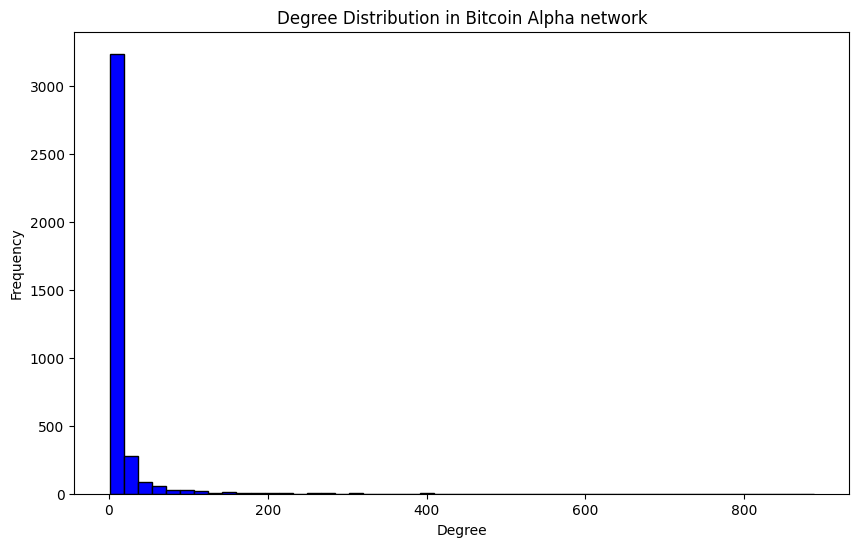

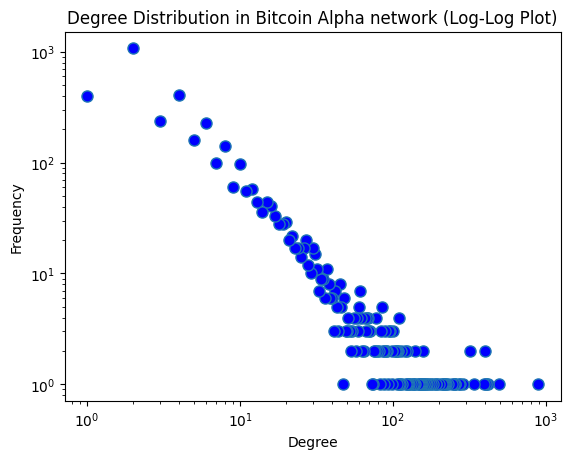

In [91]:
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, color='blue', edgecolor='black')
plt.title('Degree Distribution in Bitcoin Alpha network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()
print()

# Calculate degree frequencies
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

# Create log-log plot
fig, ax = plt.subplots()
ax.loglog(deg, cnt, marker="o", linestyle='None', markerfacecolor='blue', markersize=8)

plt.title('Degree Distribution in Bitcoin Alpha network (Log-Log Plot)')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

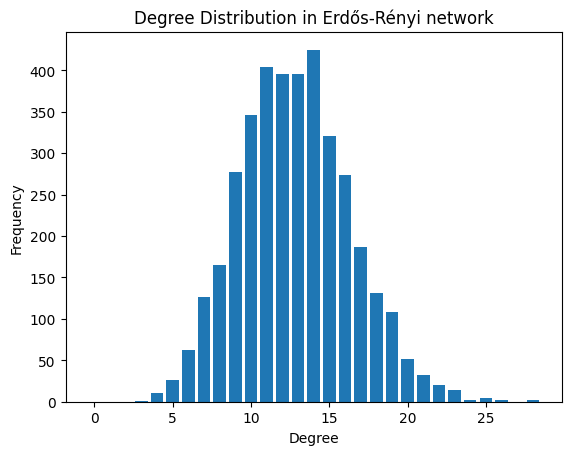

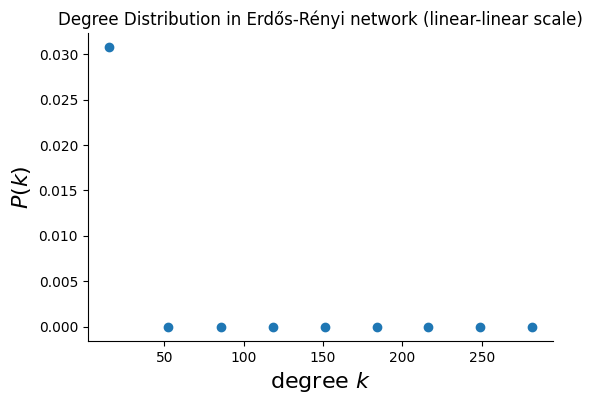

In [92]:
# Degree distribution
degree_sequence_er = sorted([d for n, d in G_er.degree()], reverse=True)  # Degree sequence
degree_counts_er = nx.degree_histogram(G_er)  # Count of nodes at each degree
plt.bar(range(len(degree_counts_er)), degree_counts_er)
plt.title("Degree Distribution in Erdős-Rényi network")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()
print()

#linear-linear scale:
bin_edges = np.linspace(kmin, kmax, num=10)
density, _ = np.histogram(degrees_er, bins=bin_edges, density=True)
fig = plt.figure(figsize=(6,4))
log_be = np.log10(bin_edges)
x = 10**((log_be[1:] + log_be[:-1])/2)
plt.plot(x, density, marker='o', linestyle='none')
plt.title("Degree Distribution in Erdős-Rényi network (linear-linear scale)")
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
# Show the plot
plt.show()

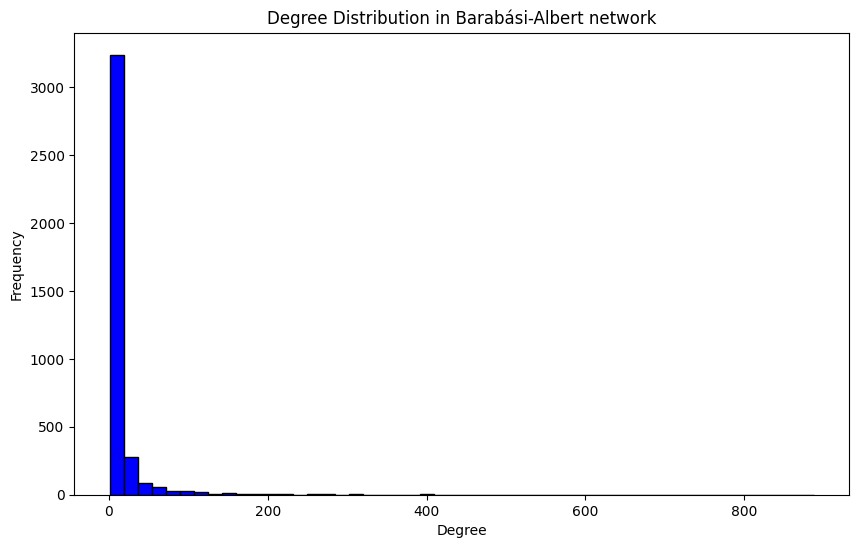

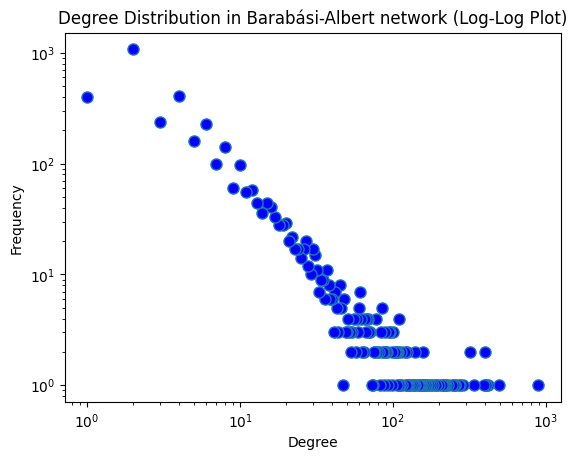

In [93]:
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, color='blue', edgecolor='black')
plt.title('Degree Distribution in Barabási-Albert network')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()
print()

# Calculate degree frequencies
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
degree_count = Counter(degree_sequence)
deg, cnt = zip(*degree_count.items())

# Create log-log plot
fig, ax = plt.subplots()
ax.loglog(deg, cnt, marker="o", linestyle='None', markerfacecolor='blue', markersize=8)

plt.title('Degree Distribution in Barabási-Albert network (Log-Log Plot)')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()

**Clustering Coefficient Distribution**

The clustering coefficient distribution provides insight into the prevalence of triangles in the network by showing the range of local clustering coefficients among all nodes. It reflects the extent to which nodes and their immediate neighbors are interlinked. The clustering coefficient distribution shows a concentration of nodes with very low or very high local clustering coefficients. The pronounced peaks at the extremes suggest a network with a significant number of nodes lacking interlinked neighbors, as well as a substantial number of nodes within highly connected clusters. This bimodal distribution indicates a network with pronounced community structure, featuring isolated nodes alongside well-connected cliques.

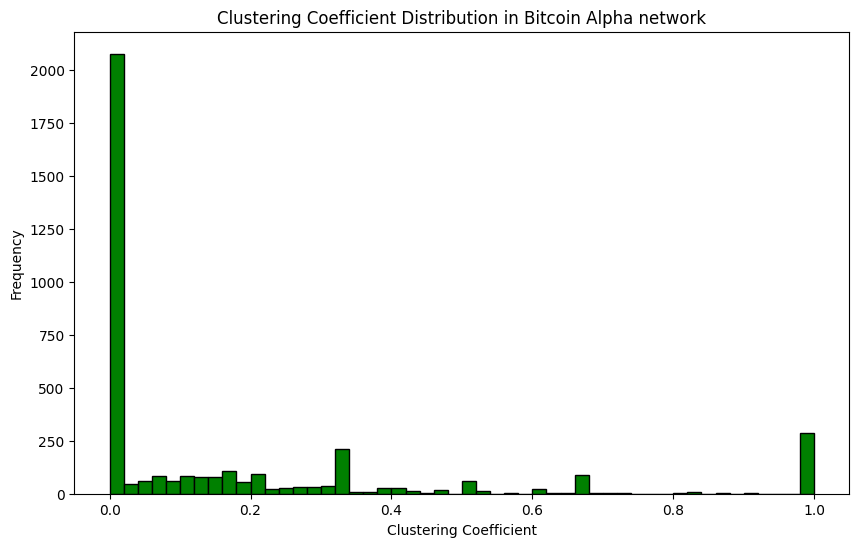

In [94]:
# Calculate the local clustering coefficient for each node
clustering_coeffs = list(nx.clustering(G_undirected).values())

plt.figure(figsize=(10, 6))
plt.hist(clustering_coeffs, bins=50, color='green', edgecolor='black')
plt.title('Clustering Coefficient Distribution in Bitcoin Alpha network')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.show()

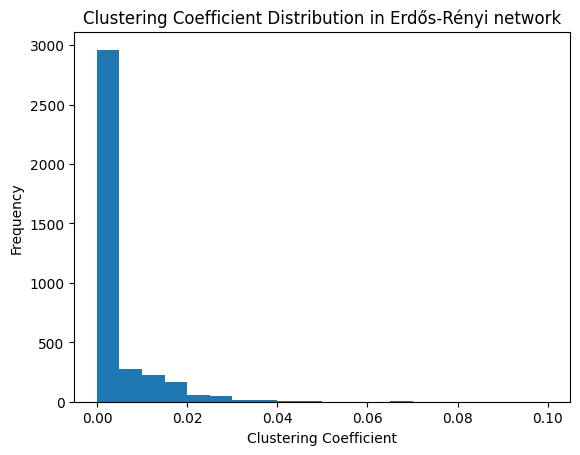

In [95]:
# Clustering coefficient distribution
clustering_coefficients_er = nx.clustering(G_er)
plt.hist(clustering_coefficients_er.values(), bins=20)
plt.title("Clustering Coefficient Distribution in Erdős-Rényi network")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()

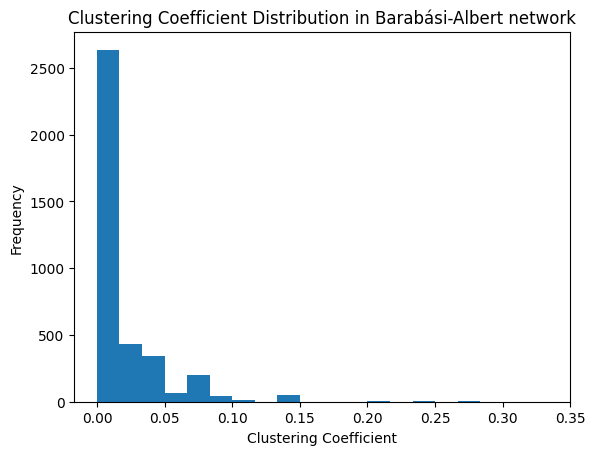

In [96]:
# Clustering coefficient distribution
clustering_coefficients_ba = nx.clustering(G_ba)
plt.hist(clustering_coefficients_ba.values(), bins=20)
plt.title("Clustering Coefficient Distribution in Barabási-Albert network")
plt.xlabel("Clustering Coefficient")
plt.ylabel("Frequency")
plt.show()

**Betweenness Centrality Distribution**

Betweenness centrality is a measure of the influence of a node over the flow of information in a network. It is defined as the fraction of all shortest paths in the network that pass through a given node. Nodes with high betweenness centrality have a significant control over information transfer in the network because more shortest paths pass through them, making them critical connectors or bridges between different parts of the network.

Analyzing the betweenness centrality distribution helps to identify such key nodes and to understand the network's structure and potential bottlenecks. In the distribution plot with a logarithmic frequency scale, a skew towards the lower end indicates that most nodes are not commonly traversed by shortest paths, while nodes with very high betweenness centrality can be seen as crucial for the network's connectivity due to their involvement in numerous shortest paths.

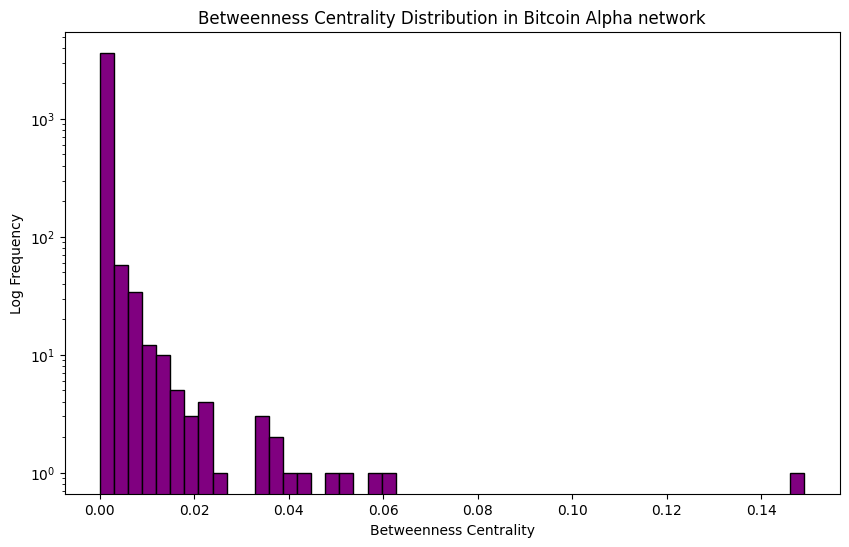

In [97]:
# Calculate the betweenness centrality for each node
bet_centrality = nx.betweenness_centrality(G)
values = list(bet_centrality.values())

# Plot the distribution of betweenness centrality values
plt.figure(figsize=(10, 6))
# Plot with a log scale on the y-axis
plt.hist(values, bins=50, log=True, color='purple', edgecolor='black')
plt.title('Betweenness Centrality Distribution in Bitcoin Alpha network')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Log Frequency')
plt.show()

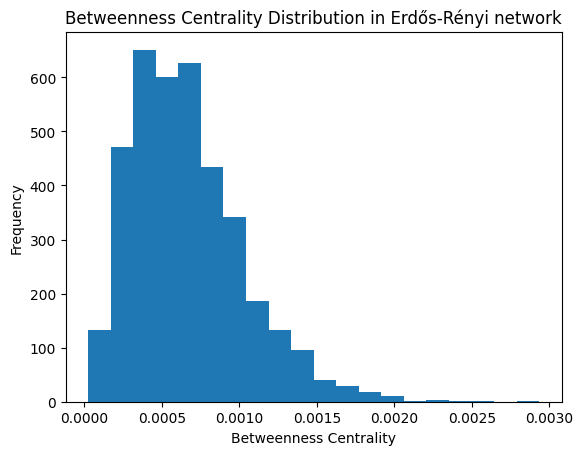

In [98]:
# Betweenness centrality distribution
betweenness_centrality_er = nx.betweenness_centrality(G_er)
plt.hist(betweenness_centrality_er.values(), bins=20)
plt.title("Betweenness Centrality Distribution in Erdős-Rényi network")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")
plt.show()

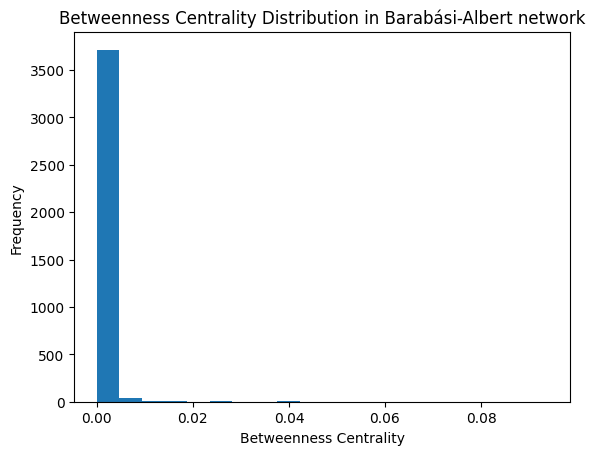

In [99]:
# Betweenness centrality distribution
betweenness_centrality_ba = nx.betweenness_centrality(G_ba)
plt.hist(betweenness_centrality_ba.values(), bins=20)
plt.title("Betweenness Centrality Distribution in Barabási-Albert network")
plt.xlabel("Betweenness Centrality")
plt.ylabel("Frequency")
plt.show()

**Connected Components Size Distribution**

The histogram visualizes the size distribution of weakly connected components in the network. It shows a prominent peak corresponding to many small components and another distinct peak indicating the presence of a single large component, which significantly differs in size from the rest. This distribution suggests that the network is dominated by one giant weakly connected component, typical of many real-world networks, with the remainder of the network fragmented into much smaller, isolated components. This pattern reflects a "core-periphery" structure, where the giant component serves as the core, and the smaller ones are on the periphery.

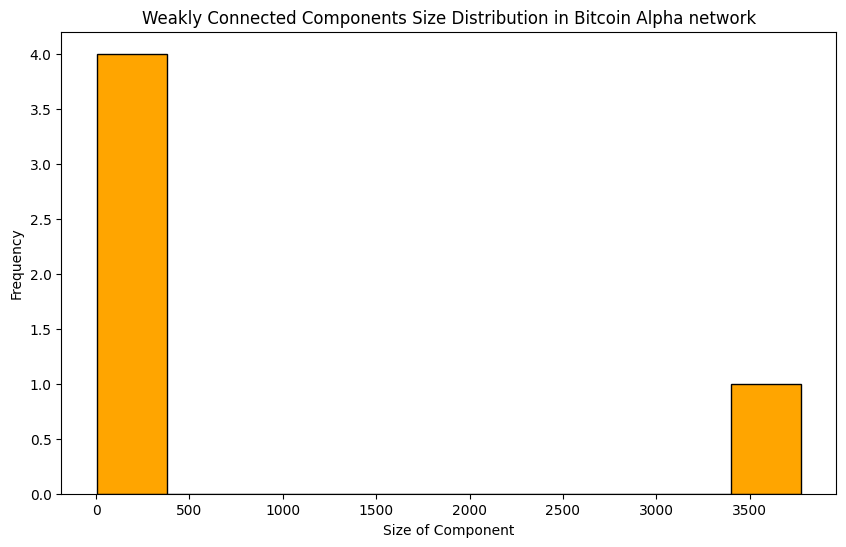

In [100]:
# Calculate the size of the weakly connected components
components_weak = [len(c) for c in sorted(nx.weakly_connected_components(G), key=len, reverse=True)]

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(components_weak, color='orange', edgecolor='black')
plt.title('Weakly Connected Components Size Distribution in Bitcoin Alpha network')
plt.xlabel('Size of Component')
plt.ylabel('Frequency')
plt.show()

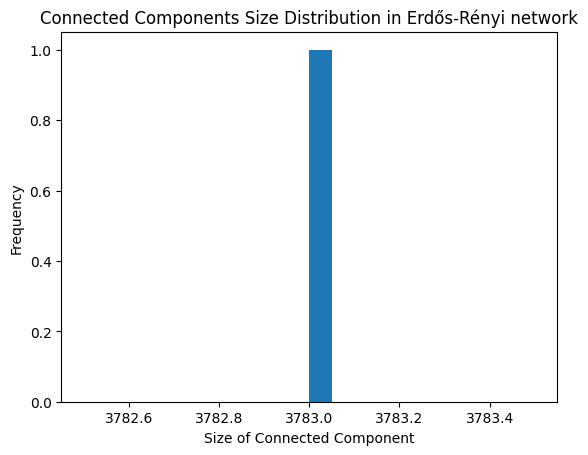

In [101]:
# Connected components size distribution
connected_components_er = sorted(nx.connected_components(G_er), key=len, reverse=True)
component_sizes_er = [len(component) for component in connected_components_er]
plt.hist(component_sizes_er, bins=20)
plt.title("Connected Components Size Distribution in Erdős-Rényi network")
plt.xlabel("Size of Connected Component")
plt.ylabel("Frequency")
plt.show()

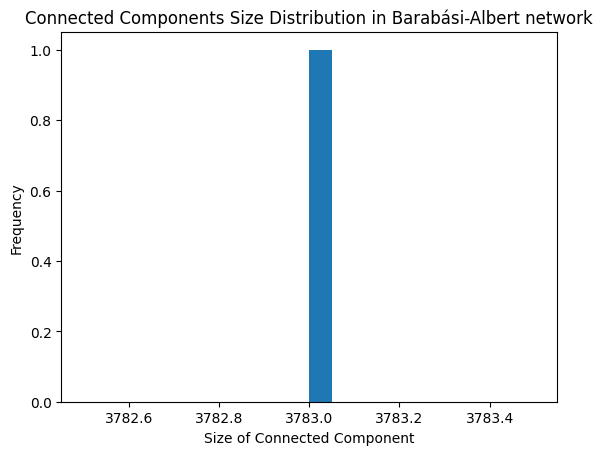

In [102]:
# Connected components size distribution
connected_components_ba = sorted(nx.connected_components(G_ba), key=len, reverse=True)
component_sizes_ba = [len(component) for component in connected_components_ba]
plt.hist(component_sizes_ba, bins=20)
plt.title("Connected Components Size Distribution in Barabási-Albert network")
plt.xlabel("Size of Connected Component")
plt.ylabel("Frequency")
plt.show()

**Degree centrality**

The nodes with the highest degree centrality are connected to a large fraction of other nodes in the network. This suggests they are highly active or popular nodes, possibly involved in a lot of transactions or interactions.

In [103]:
sorted_degree_centrality = sorted(nx.degree_centrality(G).items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by degree centrality in Bitcoin Alpha network:")
print(sorted_degree_centrality[:5])

Top 5 nodes by degree centrality in Bitcoin Alpha network:
[('1', 0.23479640401903754), ('3', 0.13061872025383395), ('4', 0.10999471179270227), ('7', 0.10761501850872554), ('11', 0.10735060814383923)]


In [104]:
# Degree centrality
degree_centrality_er = nx.degree_centrality(G_er)
sorted_degree_centrality_er = sorted(degree_centrality_er.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by degree centrality in Erdős-Rényi network:")
print(sorted_degree_centrality_er[:5])

Top 5 nodes by degree centrality in Erdős-Rényi network:
[(263, 0.007403490216816499), (1839, 0.007403490216816499), (1802, 0.006874669487043892), (3029, 0.006874669487043892), (881, 0.006610259122157588)]


In [105]:
degree_centrality_ba = nx.degree_centrality(G_ba)
sorted_degree_centrality_ba = sorted(degree_centrality_ba.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by degree centrality in Barabási-Albert network:")
print(sorted_degree_centrality_ba[:5])

Top 5 nodes by degree centrality in Barabási-Albert network:
[(8, 0.07879428873611846), (7, 0.05684822845055526), (14, 0.048122686409307246), (17, 0.04574299312533051), (10, 0.0449497620306716)]


**Betweenness centrality**

Nodes scoring high in betweenness centrality serve as significant points of connection in the network's shortest paths. They could be critical for the flow of information or resources, acting as gatekeepers or bridges between different parts of the network.

In [106]:
sorted_betweenness_centrality = sorted(bet_centrality.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by betweenness centrality in Bitcoin Alpha network:")
print(sorted_betweenness_centrality[:5])

Top 5 nodes by betweenness centrality in Bitcoin Alpha network:
[('1', 0.14915611712017005), ('2', 0.06245174844052756), ('4', 0.059195498910680114), ('11', 0.050784173397510256), ('3', 0.047749690619256435)]


In [107]:
# Betweenness centrality
sorted_betweenness_centrality_er = sorted(betweenness_centrality_er.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by betweenness centrality in Erdős-Rényi network:")
print(sorted_betweenness_centrality_er[:5])

Top 5 nodes by betweenness centrality in Erdős-Rényi network:
[(263, 0.002933778745953734), (1839, 0.0028221789021207694), (1802, 0.00261904229470042), (3029, 0.0025212801907891417), (1544, 0.0023636473113672523)]


In [108]:
sorted_betweenness_centrality_ba = sorted(betweenness_centrality_ba.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by betweenness centrality in Barabási-Albert network:")
print(sorted_betweenness_centrality_ba[:5])

Top 5 nodes by betweenness centrality in Barabási-Albert network:
[(8, 0.09391433706428944), (7, 0.058450133798237505), (14, 0.04228625238923392), (10, 0.03967237492412447), (17, 0.03851293363329187)]


**Closeness centrality**

Top nodes by closeness centrality can reach other nodes in the network with fewer steps, on average. This indicates they are well-positioned to quickly disseminate information to the rest of the network or to efficiently gather information from around the network.

In [109]:
sorted_closeness_centrality = sorted(nx.closeness_centrality(G).items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by closeness centrality in Bitcoin Alpha network:")
print(sorted_closeness_centrality[:5])

Top 5 nodes by closeness centrality in Bitcoin Alpha network:
[('2', 0.36679457392726394), ('11', 0.36526606417786006), ('1', 0.3587718223102824), ('10', 0.3529036369931791), ('4', 0.34615304292506327)]


In [110]:
# Closeness centrality
closeness_centrality_er = nx.closeness_centrality(G_er)
sorted_closeness_centrality_er = sorted(closeness_centrality_er.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by closeness centrality in Erdős-Rényi network:")
print(sorted_closeness_centrality_er[:5])

Top 5 nodes by closeness centrality in Erdős-Rényi network:
[(1839, 0.31561378619711256), (263, 0.3152980408503543), (2815, 0.31166048619695097), (1544, 0.31145515935106644), (1955, 0.3111476758535582)]


In [111]:
closeness_centrality_ba = nx.closeness_centrality(G_ba)
sorted_closeness_centrality_ba = sorted(closeness_centrality_ba.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by closeness centrality in Barabási-Albert network:")
print(sorted_closeness_centrality_ba[:5])

Top 5 nodes by closeness centrality in Barabási-Albert network:
[(8, 0.47069072806471685), (7, 0.4490619805271907), (9, 0.43331805682859764), (10, 0.4300659540595861), (14, 0.4300659540595861)]


**Eigenvector centrality**

High eigenvector centrality scores indicate nodes that are not just well-connected but are also connected to other well-connected nodes. This can point to influential nodes that are likely to be central to the core structure of the network.

In [112]:
sorted_eigenvector_centrality = sorted(nx.eigenvector_centrality(G).items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by eigenvector centrality in Bitcoin Alpha network:")
print(sorted_eigenvector_centrality[:5])

Top 5 nodes by eigenvector centrality in Bitcoin Alpha network:
[('11', 0.19674272634062157), ('3', 0.17792674463038116), ('2', 0.168706167505079), ('177', 0.16180239213590394), ('7', 0.15686151627909245)]


In [113]:
# Eigenvector centrality
eigenvector_centrality_er = nx.eigenvector_centrality(G_er)
sorted_eigenvector_centrality_er = sorted(eigenvector_centrality_er.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by eigenvector centrality in Erdős-Rényi network:")
print(sorted_eigenvector_centrality_er[:5])

Top 5 nodes by eigenvector centrality in Erdős-Rényi network:
[(1839, 0.03839751212917114), (263, 0.03710766195687691), (2815, 0.0344599050478787), (1955, 0.03349397749748022), (881, 0.033279653435737126)]


In [114]:
eigenvector_centrality_ba = nx.eigenvector_centrality(G_ba)
sorted_eigenvector_centrality_ba = sorted(eigenvector_centrality_ba.items(), key=lambda x: x[1], reverse=True)
print("Top 5 nodes by eigenvector centrality in Barabási-Albert network:")
print(sorted_eigenvector_centrality_ba[:5])

Top 5 nodes by eigenvector centrality in Barabási-Albert network:
[(8, 0.29869754194006615), (7, 0.21497135617093388), (9, 0.1625908741292245), (14, 0.16194642988148236), (0, 0.15741996957800605)]


**Visualization**

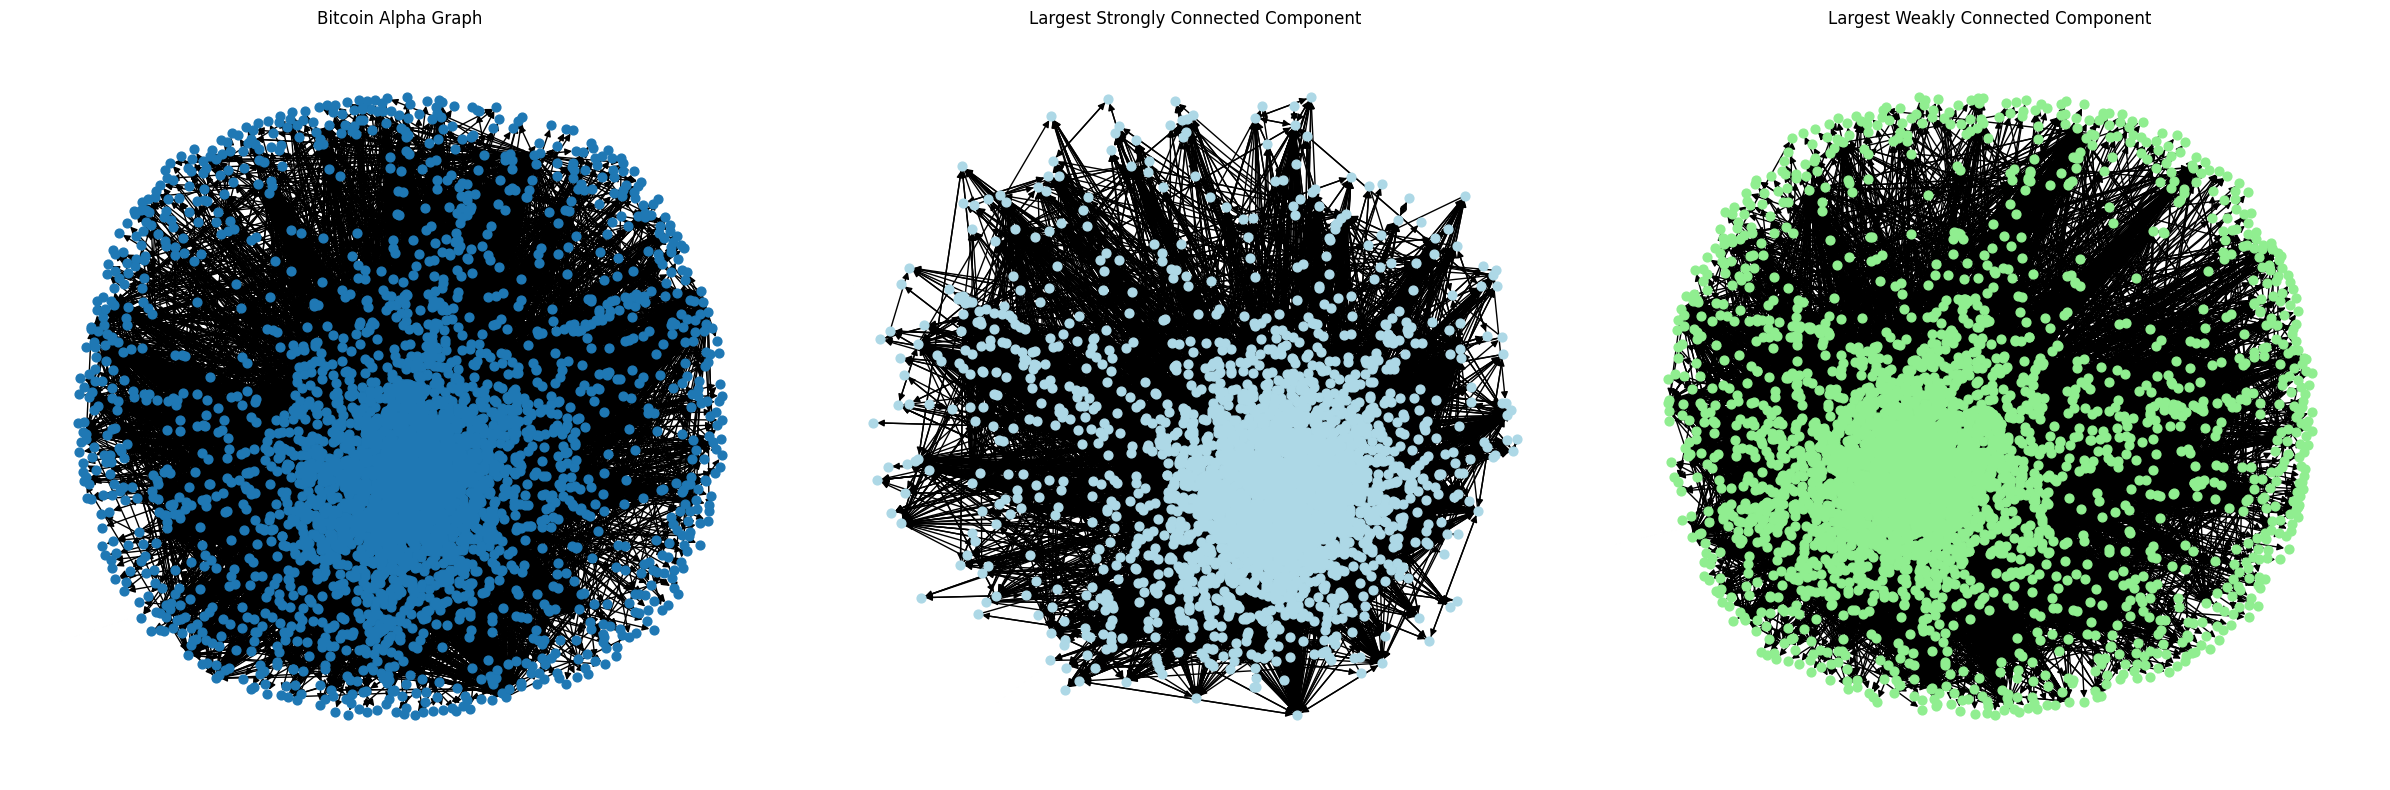

In [115]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))
# Draw the original graph G
nx.draw_spring(G, node_size=40, ax=axes[0])
axes[0].set_title('Bitcoin Alpha Graph')

# Draw SCC subgraph
nx.draw_spring(scc_subgraph, node_size=40, ax=axes[1], node_color='lightblue')
axes[1].set_title('Largest Strongly Connected Component')

# Draw WCC subgraph
nx.draw_spring(wcc_subgraph, node_size=40, ax=axes[2], node_color='lightgreen')
axes[2].set_title('Largest Weakly Connected Component')

# Display the plots
plt.tight_layout()
plt.show()

Erdős-Rényi network


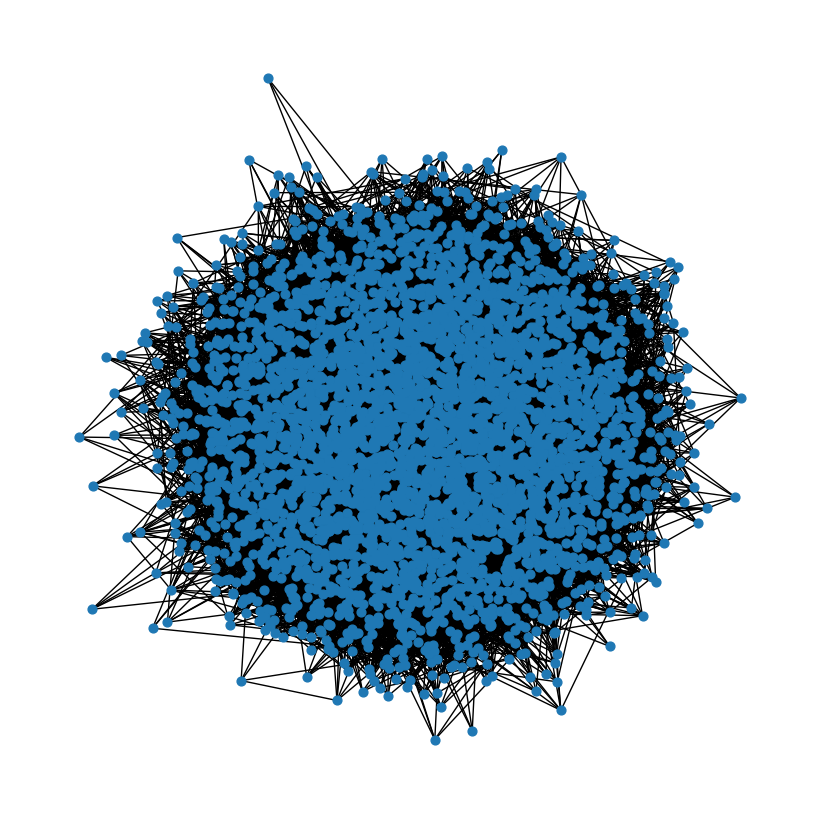

In [116]:
print("Erdős-Rényi network")
fig = plt.figure(figsize=(8,8))
nx.draw_spring(G_er, node_size=40)

Barabási-Albert network


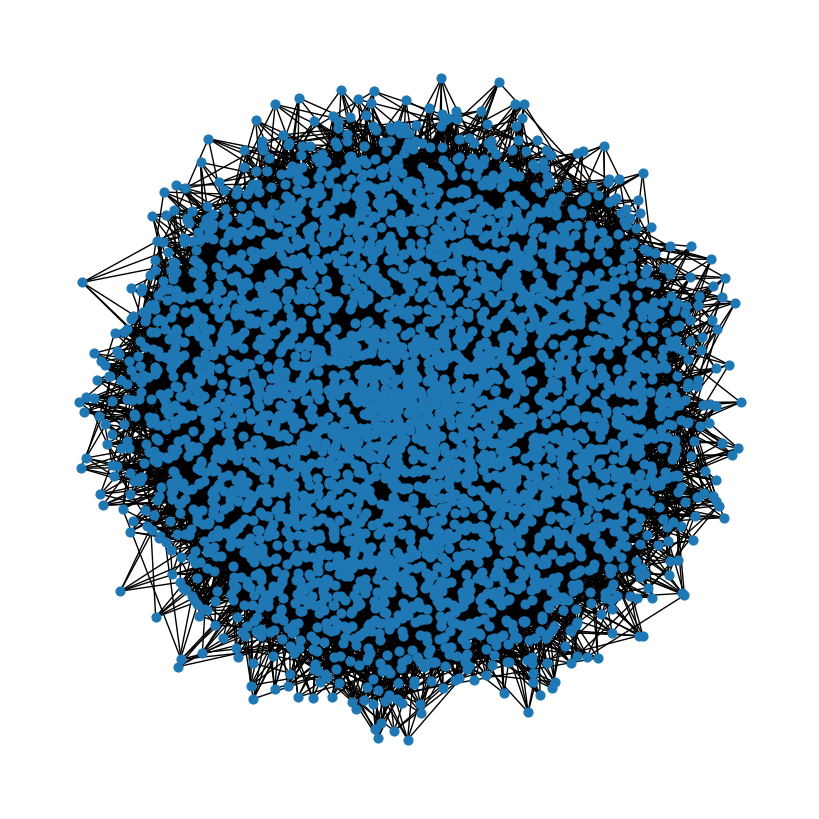

In [117]:
print("Barabási-Albert network")
fig = plt.figure(figsize=(8,8))
nx.draw_spring(G_ba, node_size=40)

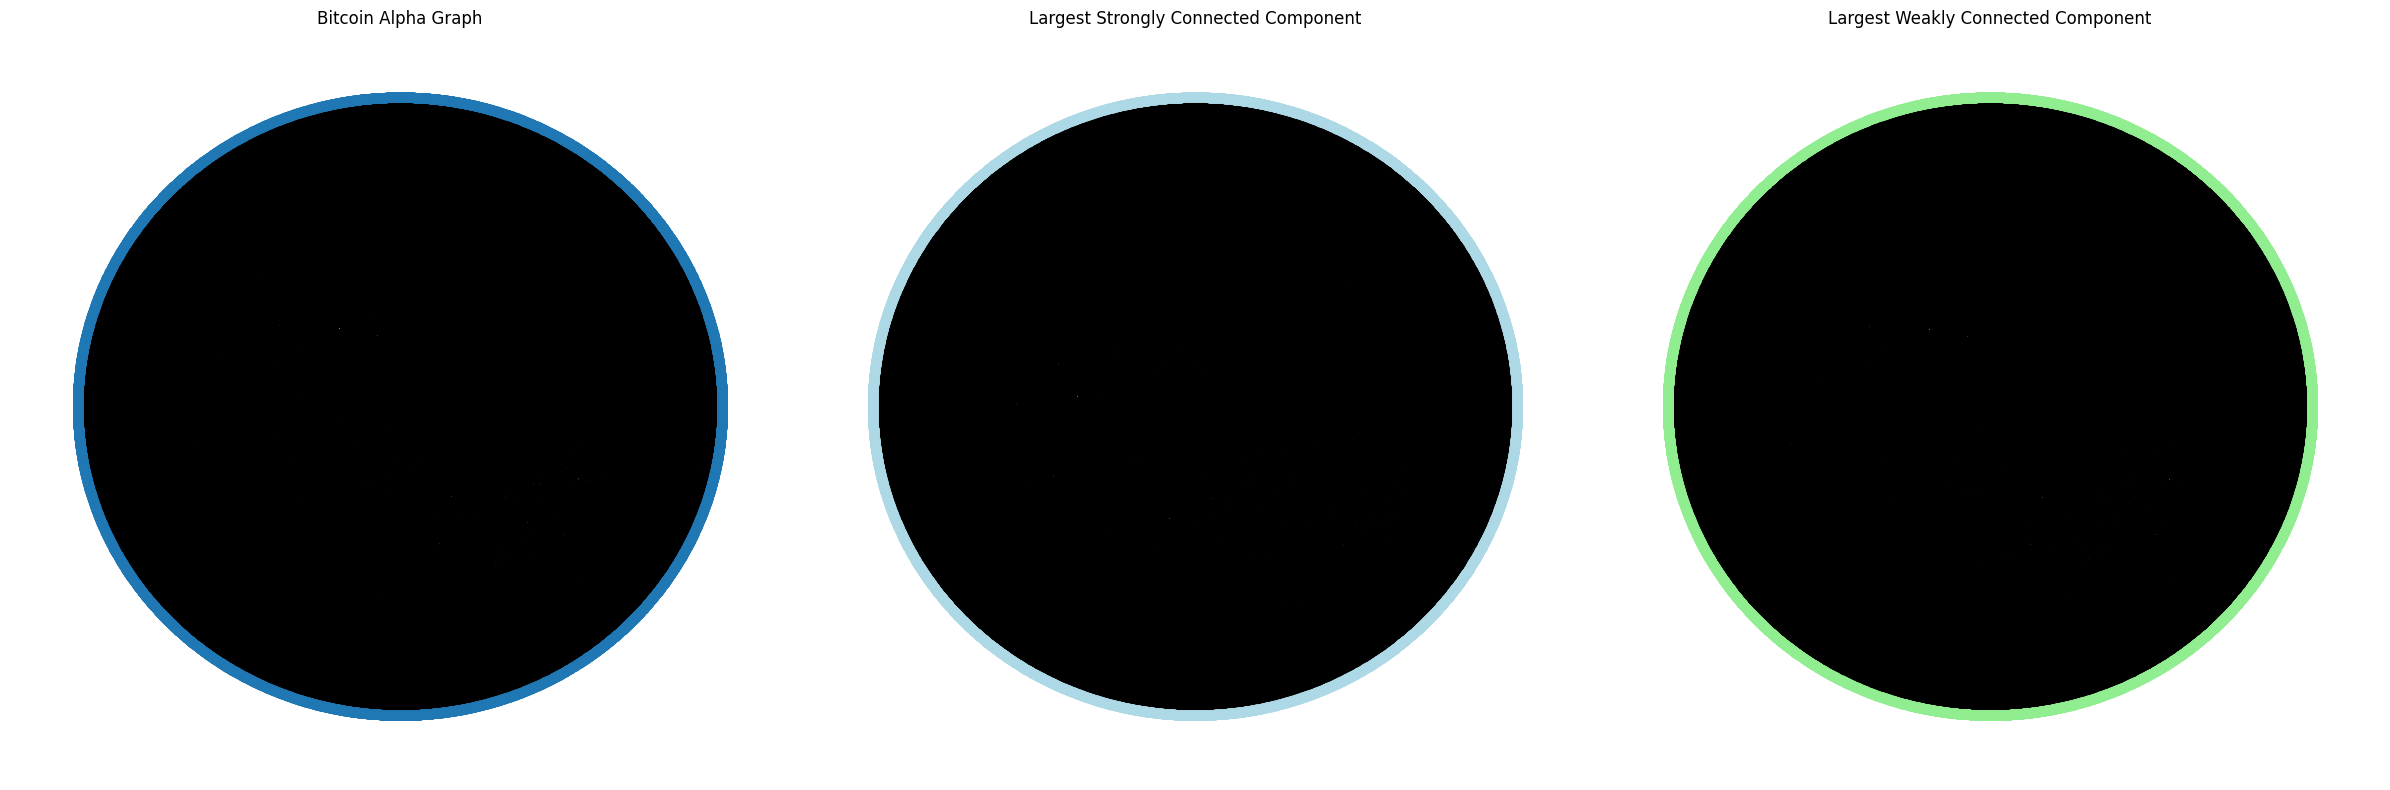

In [118]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24, 8))
# Draw the original graph G
nx.draw_circular(G, node_size=40, ax=axes[0])
axes[0].set_title('Bitcoin Alpha Graph')

# Draw SCC subgraph
nx.draw_circular(scc_subgraph, node_size=40, ax=axes[1], node_color='lightblue')
axes[1].set_title('Largest Strongly Connected Component')

# Draw WCC subgraph
nx.draw_circular(wcc_subgraph, node_size=40, ax=axes[2], node_color='lightgreen')
axes[2].set_title('Largest Weakly Connected Component')

# Display the plots
plt.tight_layout()
plt.show()

Erdős-Rényi network


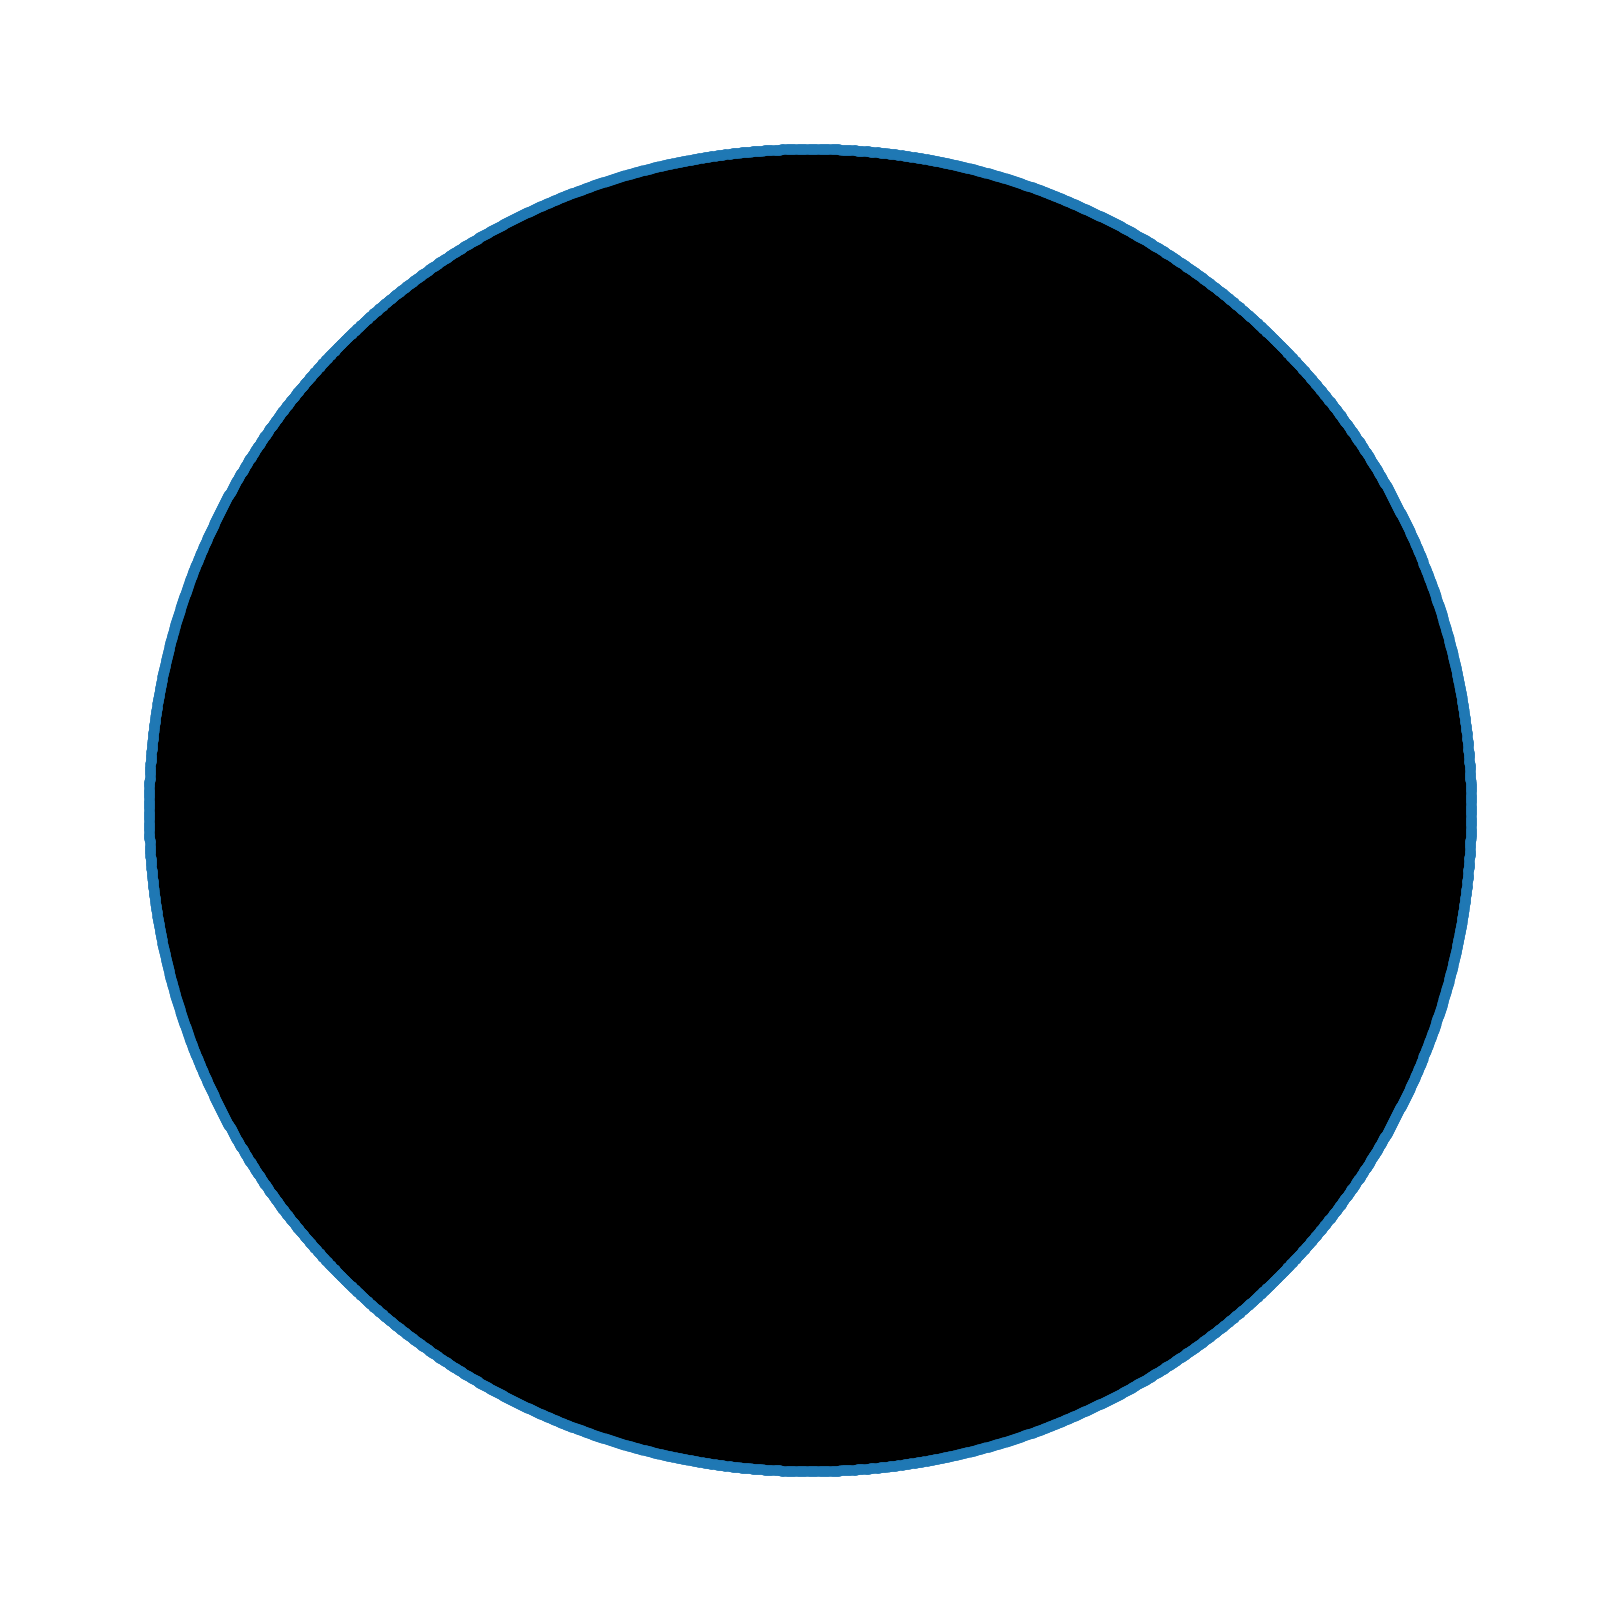

In [119]:
print("Erdős-Rényi network")
fig = plt.figure(figsize=(16,16))
nx.draw_circular(G_er, node_size=40)

Barabási-Albert network


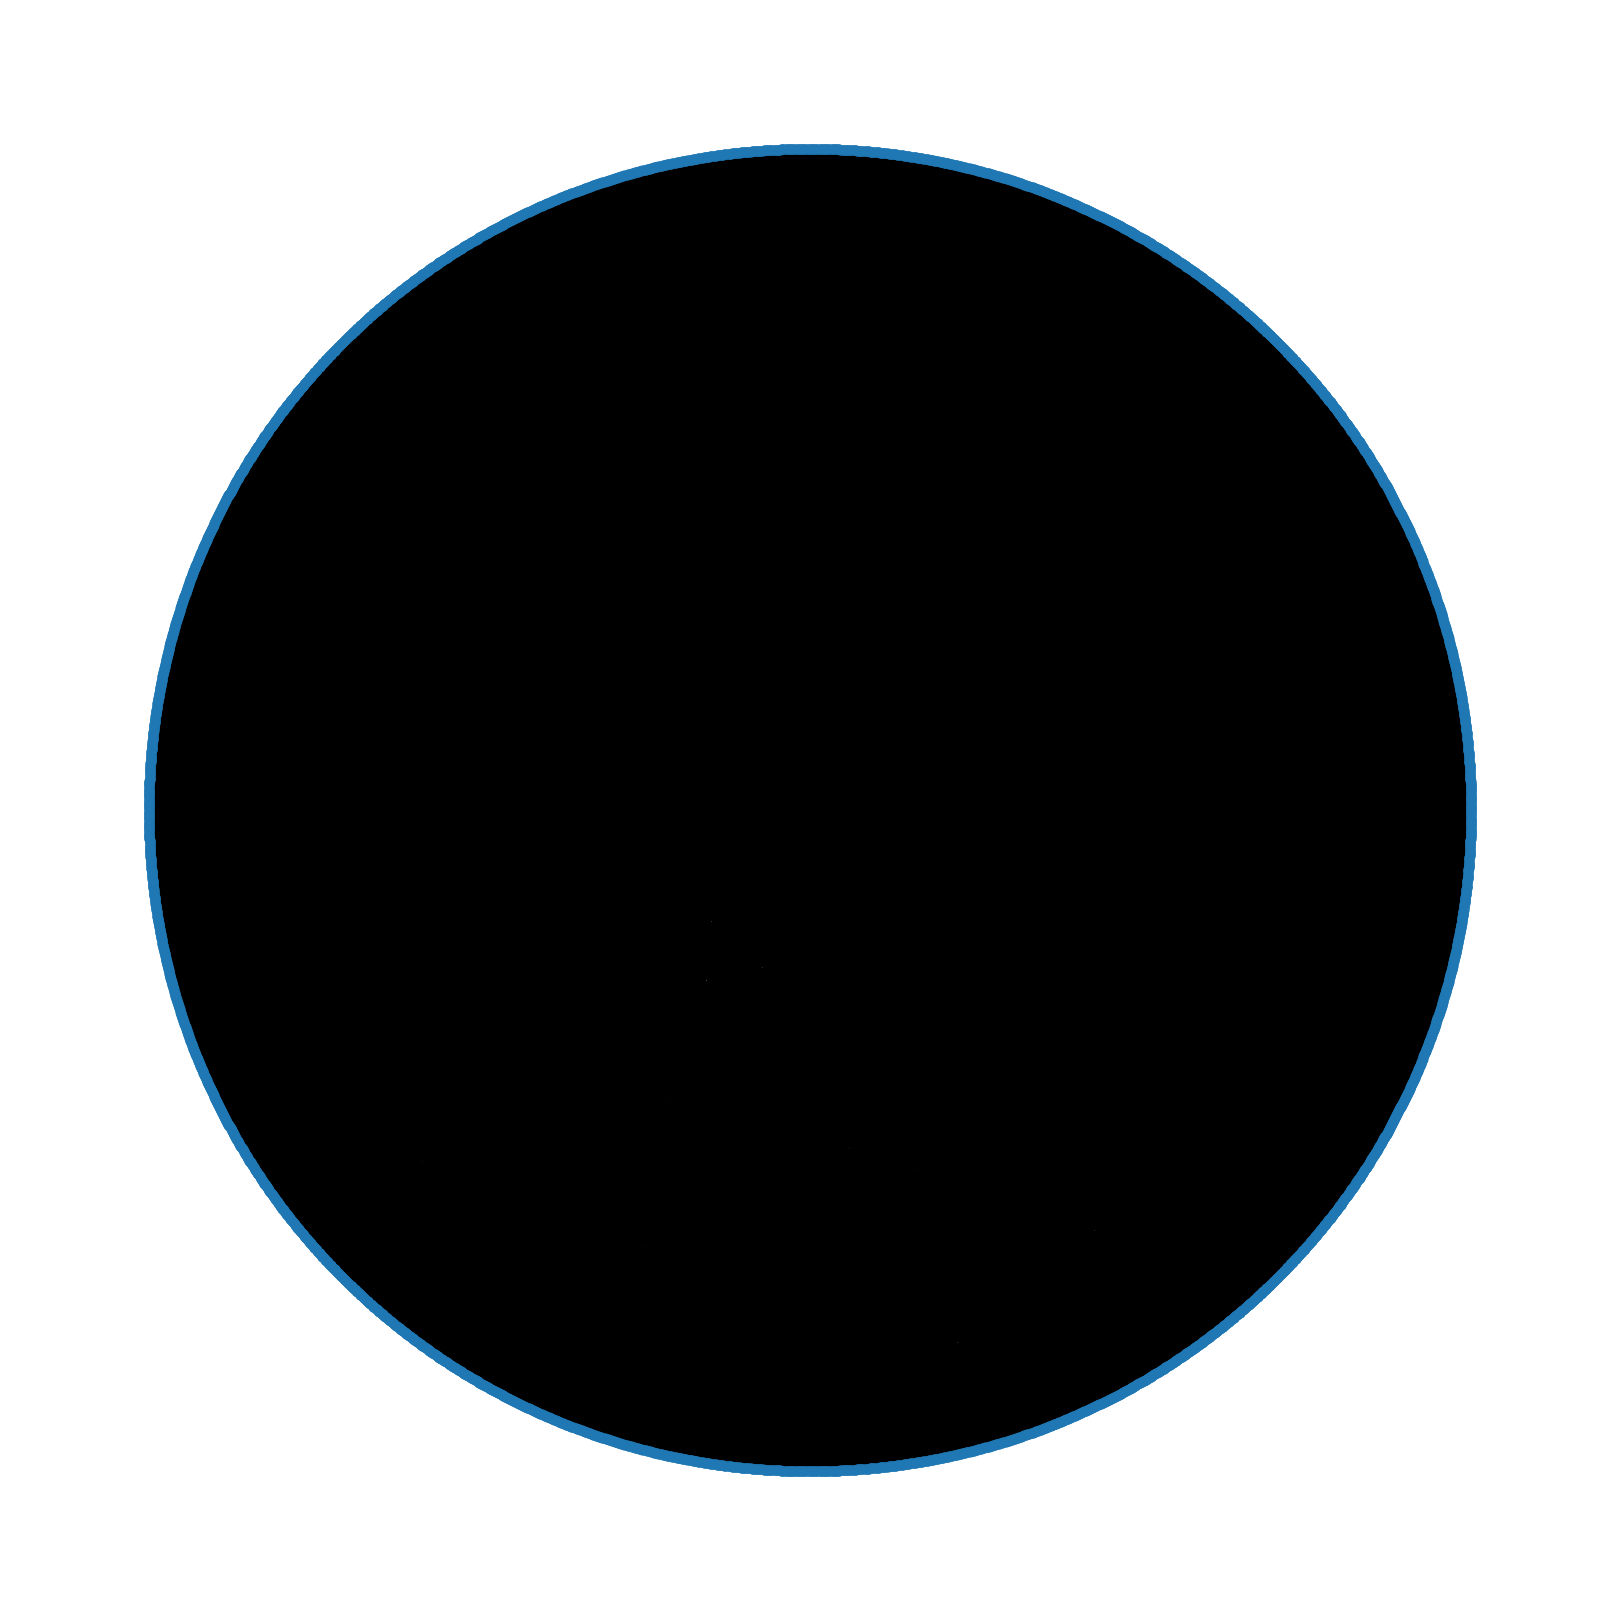

In [120]:
print("Barabási-Albert network")
fig = plt.figure(figsize=(16,16))
nx.draw_circular(G_ba, node_size=40)